In [1]:
# Z train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at Z line only
Z_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('Z')]

In [5]:
# look at all station names
Z_train_all['STATION'].unique()

array(['104 ST', '121 ST', '75 ST-ELDERTS', 'BOWERY', 'BROAD ST',
       'BROADWAY JCT', 'BROOKLYN BRIDGE', 'CANAL ST', 'CHAMBERS ST',
       'CHAUNCEY ST', 'CRESCENT ST', 'DELANCEY/ESSEX', 'FULTON ST',
       'GATES AV', 'JAMAICA CENTER', 'MARCY AV', 'MYRTLE AV',
       'NORWOOD AV', 'SUTPHIN-ARCHER', 'VAN SICLEN AV', 'WOODHAVEN BLVD'],
      dtype=object)

In [6]:
# check station count
Z_train_all['STATION'].count()

22

In [8]:
# needs further cleaning
Z_train_all["STATION"].replace("BROOKLYN BRIDGE", value="CHAMBERS ST", inplace=True)

In [10]:
# now sum same name rows
Z_commuters = Z_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
Z_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
104 ST,1539.0,35.0
121 ST,1251.0,253.0
75 ST-ELDERTS,3857.0,295.0
BOWERY,354.0,1023.0
BROAD ST,841.0,2089.0


In [11]:
# order stations in excel
# save as csv
Z_commuters.to_csv('Z_commuters.csv')

In [13]:
# open ordered CSV
csv_path_Z = 'Z_commuters_order.csv'
Z_commuters_order = pd.read_csv(csv_path_Z, encoding="utf-8")
Z_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,JAMAICA CENTER,33067,5697
1,SUTPHIN-ARCHER,22381,9521
2,121 ST,1251,253
3,104 ST,1539,35
4,WOODHAVEN BLVD,3887,579


In [14]:
Z_commuters_order['AM_AVG_ENTER'] = Z_commuters_order['AM_ENTERS']/5

In [15]:
Z_commuters_order['AM_AVG_EXIT'] = Z_commuters_order['AM_EXITS']/5
Z_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,JAMAICA CENTER,33067,5697,6613.4,1139.4
1,SUTPHIN-ARCHER,22381,9521,4476.2,1904.2
2,121 ST,1251,253,250.2,50.6
3,104 ST,1539,35,307.8,7.0
4,WOODHAVEN BLVD,3887,579,777.4,115.8


In [16]:
# order stations in excel
# save as csv
Z_commuters_order.to_csv('Z_commuters_final.csv')

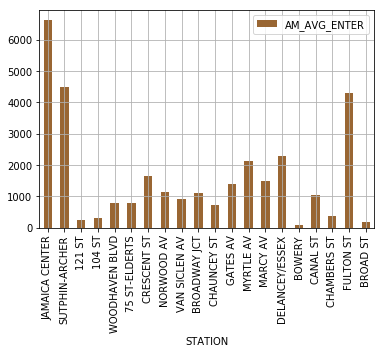

In [17]:
# graph Z Train AM AVG ENTERS
plt = Z_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#996633')
plt.grid()

# save the fig
plt.figure.savefig('Z-AM-enter.pdf')

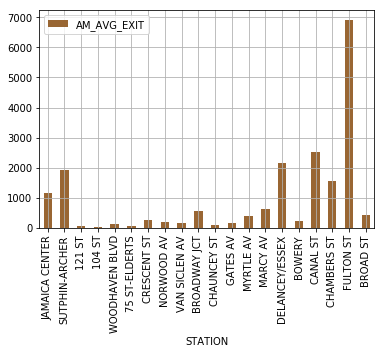

In [18]:
# graph Z Train AM AVG EXITS
plt = Z_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#996633')
plt.grid()

# save the fig
plt.figure.savefig('Z-AM-exit.pdf')